In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Singular value decomposition
---


In [2]:
# the matrix
A = [ [3,0,5], [8,1,3] ]

# Note differences from MATLAB: S is vector, V is V'
U,S,V = np.linalg.svd(A)

print(U), print(' ')
print(S), print(' ')
print(V)

[[-0.52138438 -0.85332193]
 [-0.85332193  0.52138438]]
 
[9.89086518 3.18916698]
 
[[-0.84833111 -0.08627374 -0.52238986]
 [ 0.50518185  0.16348607 -0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


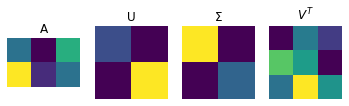

In [3]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()

# VIDEO: Relation between singular values and eigenvalues

In [4]:
# case 1: eig(A'A) vs. svd(A)

A = np.array([ [3,1,0], [1,1,0] ])

print( np.sort(np.linalg.eig(A.T@A)[0]) )
print( np.sort(np.linalg.svd(A)[1])**2 )

[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425]


In [5]:
# case 2: eig(A'A) vs. svd(A'A)

print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A.T@A)[1]))

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


In [6]:
# case 3a: eig(A) vs. svd(A), real-valued eigs

# need a square matrix for eig
A = [ [3,1,0], [1,1,0], [1,1,1]]

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))

[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011]


In [7]:
# case 3b: eig(A) vs. svd(A), complex eigs

# random matrices are likely to give complex eigenvalues
A = np.random.randn(3,3)

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))

[-0.87273907-2.06873169j -0.87273907+2.06873169j  0.93343487+0.j        ]
[0.79881054 2.0579197  2.86257217]



---
# VIDEO: Spectral theory of matrices
---


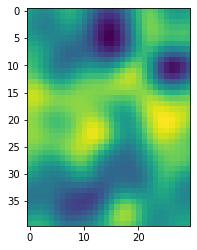

In [8]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()

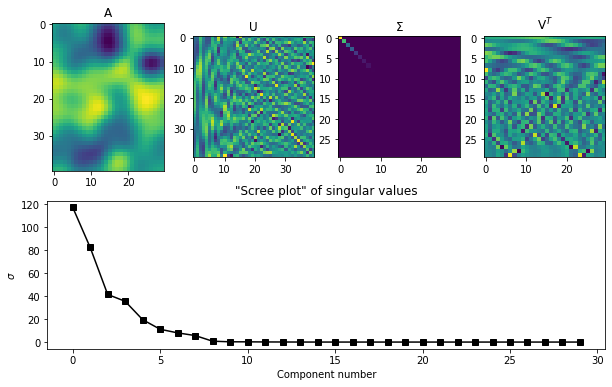

In [9]:
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(10,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

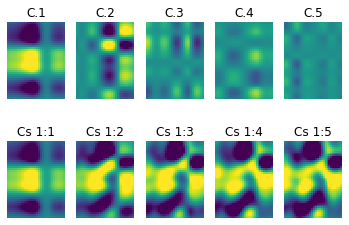

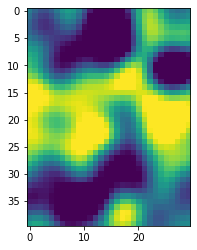

In [10]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()


---
# VIDEO: SVD for low-rank approximations
---


In [11]:
# number of components (singular "layers") to keep
nComps = 5

# reduced matrices
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,:]

# low-rank apporoximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print( 'rank =',np.linalg.matrix_rank(reconImage) )

rank = 5


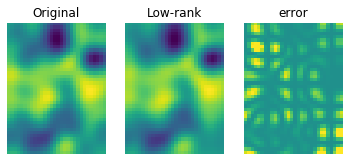

In [12]:
# error map and percent difference from original matrix
errormap = (reconImage-A)**2

# show the results!
plt.subplot(131)
plt.imshow(A)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage)
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errormap,vmin=-1,vmax=1)
plt.axis('off')
plt.title('error')
plt.show()



---
# VIDEO: Convert singular values to percent variance
---


In [13]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

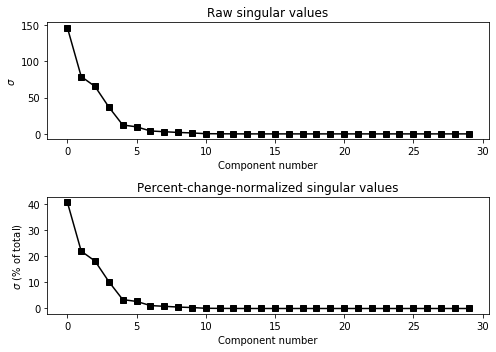

In [14]:
Ascaled = A*1

# SVD
U,s,V = np.linalg.svd(Ascaled)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig = plt.subplots(1,figsize=(7,5))

plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()


---
# VIDEO: SVD, matrix inverse, and pseudoinverse
---


In [15]:

# the matrix
A = [ [1,2,3],
      [1,2,4], # hint: change 2->0 for invertible matrix to test
      [1,2,5]  ]
  
# SVD
U,S,V = np.linalg.svd(A)

# pseudoinvert S
nonzeroels = S>10**-14 # find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements

# now pseudoinvert A
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print( Ai@A ), print(' ')

# compute with pinv function
print( np.linalg.pinv(A)@A )


[[ 2.00000000e-01  4.00000000e-01  0.00000000e+00]
 [ 4.00000000e-01  8.00000000e-01  0.00000000e+00]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]
 
[[ 2.00000000e-01  4.00000000e-01  0.00000000e+00]
 [ 4.00000000e-01  8.00000000e-01  0.00000000e+00]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]


In [16]:
import inspect
lines = inspect.getsource(np.linalg.pinv)
print(lines)

@array_function_dispatch(_pinv_dispatcher)
def pinv(a, rcond=1e-15, hermitian=False):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.

    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.

    .. versionchanged:: 1.14
       Can now operate on stacks of matrices

    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to False.

        .. versionadded:: 1.17.0

    Returns
    -------
    


---
# VIDEO: Condition number of a matrix
---


131.56005999432122 6.187065096001371e-10


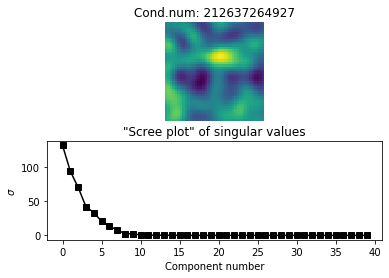

In [17]:

# matrix sizes
m = 40

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = np.random.randn(m,m)
A = scipy.signal.convolve2d(A,g2d,'same')



# SVD
S = np.linalg.svd(A)[1]

# compute condition number
condnum = S[0]/S[-1]
print(S[0],S[-1])

# show the matrix
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num: %d' %condnum)

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

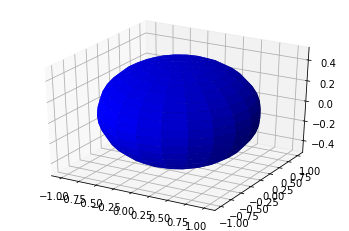

In [18]:
## sphere

# the transformation matrix T
T = np.eye(3)
T[-1,-1] = .5


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.axis('square')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()